AI4I 2020 Predictive Maintenance Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pylab as plt
from sklearn import datasets, ensemble, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

%matplotlib inline

In [2]:
df = pd.read_csv('ai4i2020_temp.csv', names = ["UDI", "Product ID", "Type",  
            "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", 
                                        "Tool wear [min]", "TWF", "HDF", "PWF", "OSF", "RNF", "Machine failure"])
#df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# Change column to int
#print(type(df['Product ID'][0]))
df.replace('L', 0, inplace=True)
df.replace('M', 1, inplace=True)
df['Type'][df['Type'] == 'H'] = 2
print(type(df['Type'][9998]))

#df['Air temperature [K]'] = df['Air temperature [K]'].astype(float)
#df['Process temperature [K]'] = df['Process temperature [K]'].astype(float)
#df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype(float)
#df['Torque [Nm]'] = df['Torque [Nm]'].astype(float)

<class 'int'>


C:\Users\santo\AppData\Local\Temp/ipykernel_18660/1426831563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'][df['Type'] == 'H'] = 2


In [4]:
df
#correlation = df.corr()
#correlation

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,1,M14860,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [5]:
feature_names = ["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", 
                 "Tool wear [min]", "TWF", "HDF", "PWF", "OSF", "RNF"]

# Separating out the features
X = df[feature_names].values

# Separating out the target
y = df['Machine failure'].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [6]:
X

array([[ 0.74441274, -0.95238944, -0.94735989, ..., -0.10786004,
        -0.09793424, -0.09948362],
       [-0.74530658, -0.90239341, -0.879959  , ..., -0.10786004,
        -0.09793424, -0.09948362],
       [-0.74530658, -0.95238944, -1.01476077, ..., -0.10786004,
        -0.09793424, -0.09948362],
       ...,
       [ 0.74441274, -0.50242514, -0.94735989, ..., -0.10786004,
        -0.09793424, -0.09948362],
       [ 2.23413206, -0.50242514, -0.879959  , ..., -0.10786004,
        -0.09793424, -0.09948362],
       [ 0.74441274, -0.50242514, -0.879959  , ..., -0.10786004,
        -0.09793424, -0.09948362]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=2)

In [8]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
res = decision_tree.predict(X_test)
score = accuracy_score(res, y_test)
print('Decision Tree Accuracy:', score)

Decision Tree Accuracy: 0.9971428571428571


In [9]:
#importances = decision_tree.feature_importances_
#indices = np.argsort(importances)
#importances

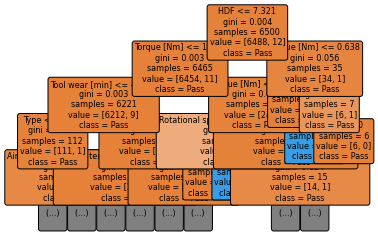

In [10]:
#visualization
vis = tree.plot_tree(decision_tree, feature_names = feature_names, class_names = ['Pass', 'Fail'], 
                     max_depth=4, fontsize=8, filled=True, rounded=True)